KoNLPy 설치
-----

자세한 설치방법<br>
https://hong-yp-ml-records.tistory.com/37?category=847360<br>
제 블로그입니다...^^

1. JDK 다운 받기<br>
http://www.oracle.com/technetwork/java/javase/downloads/index.html<br>
위 링크에서 자신의 컴퓨터 OS에 맞는 JDK 파일을 다운로드 받은 뒤 파일을 실행시킵니다.

2. 시스템 환경 변수 설정하기<br>
컴퓨터에서 시스템 환경 변수 편집(제어판)을 검색합니다.<br>
누르면 나오는 창에서 고급 탭의 환경변수를 누릅니다.<br>
위의 사용자 변수에서 '새로 만들기' 버튼을 누르고 변수 이름에 'JAVA_HOME', 값에는 앞서 다운받은 JDK 파일의 경로를 붙여 넣습니다.<br>
아래 시스템 변수에서도 똑같은 작업을 해줍니다.
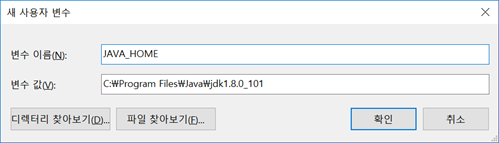
3. JPype 설치하기<br>
http://www.lfd.uci.edu/~gohlke/pythonlibs/#jpype<br>
위 링크에서 자신의 파이썬 버전과 OS에 맞는 파일을 다운로드 받습니다.<br>
(파이썬 버전 확인 방법: anaconda prompt에 python -V 입력)<br>
다음 파일의 경로를 복사한 뒤 cmd 창에서 해당 경로로 전환해줍니다.<br>
이후 .whl파일 명을 복사한 뒤 `pip install [파일명.whl]`을 실행해줍니다.<br>
만약 업데이트가 필요하다는 문구가 뜬다면 `python -m pip install --upgrade pip`를 입력하세요.

4. KoNLPy 설치하기<br>
마지막은 간단합니다. anaconda prompt에 `pip install konlpy`를 입력하시면 됩니다.

'수돗물 유충' 네이버 기사 워드 클라우드
-----
워드 클라우드는 텍스트에 쓰인 단어를 빈도 분석한 후 시각화 한 결과물을 말합니다.<br>
때문에 워드 클라우드는 '빈도 분석'을 우선시하는데요, '빈도 분석' 이후 결과물을 시각화하여 봅시다.

In [1]:
# import
import konlpy.tag

In [2]:
# Okt 불러오기
# Twitter의 이름이 Okt로 변경됨.
okt = konlpy.tag.Okt()

# twitter = konlpy.tag.twitter()로도 활용할 수 있음.

<img src="konlpy1.png" alt="주요옵션" style="width: 600px;"/>

<img src="konlpy2.png" alt="주요옵션" style="width: 600px;"/>

In [3]:
import pandas as pd
import re

In [4]:
# 데이터 불러오기
df = pd.read_csv('네이버 뉴스 크롤링.csv')
df.head()

,Unnamed: 0,기사 제목,URL,신문사,기사 작성일
0,0,광주에서도 수돗물 유충 신고 잇따라...정수장시설은 문제 없어,http://www.kyeongin.com/main/view.php?key=2020...,경인일보,2020.07.18.
1,1,깔다구 유충없어요 ~ “광주 수돗물 안전하게 드세요”,https://www.wikitree.co.kr/articles/553460,위키트리,2020.07.18.
2,2,붉은 수돗물 이어 유충까지…2년 연속 ’수돗물 말썽’에 주민 분노,http://www.kukinews.com/newsView/kuk202007170284,쿠키뉴스,2020.07.18.
3,3,"'수돗물 유충' 인천→시흥·화성 확산 ""전국 정수장 긴급점검""",http://www.ccreview.co.kr/news/articleView.htm...,충청리뷰,2020.07.18.
4,4,‘수돗물 유충’ 전국 정수장 긴급 점검…‘늑장 대응’ 도마,https://news.naver.com/main/read.nhn?mode=LSD&...,KBS,2020.07.18.


In [5]:
# 데이터 정보 확인하기 .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 972 entries, 0 to 971
Data columns (total 5 columns):
Unnamed: 0    972 non-null int64
기사 제목         972 non-null object
URL           972 non-null object
신문사           972 non-null object
기사 작성일        950 non-null object
dtypes: int64(1), object(4)
memory usage: 38.0+ KB


In [8]:
# 데이터 결측값 개수 확인하기 
df.isnull().sum()

Unnamed: 0     0
기사 제목          0
URL            0
신문사            0
기사 작성일        22
dtype: int64

In [9]:
# 결측값 제거 및 인덱스 초기화
df = df.dropna(subset = ["기사 작성일"]).reset_index(drop = True)

In [10]:
# 지난시간에 배운 re를 활용하여 Text Cleaning 연습 (첫번째 기사제목)
re.sub("[^\w\s]", " ", df["기사 제목"][0])

'광주에서도 수돗물 유충 신고 잇따라   정수장시설은 문제 없어'

In [11]:
# Text Cleaning
data_list = []

for k in range(len(df["기사 제목"])):
    title = re.sub('[^\w\s]',' ',df["기사 제목"][k])
    time = df["기사 작성일"][k]
    data = title, time
    data_list.append(data)

In [12]:
# 새로운 데이터 프레임 만들기
df2 = pd.DataFrame(data_list, columns = ['기사 제목', '기사 작성일'])

In [13]:
# 데이터프레임 확인하기
df2.head()

,기사 제목,기사 작성일
0,광주에서도 수돗물 유충 신고 잇따라 정수장시설은 문제 없어,2020.07.18.
1,깔다구 유충없어요 광주 수돗물 안전하게 드세요,2020.07.18.
2,붉은 수돗물 이어 유충까지 2년 연속 수돗물 말썽 에 주민 분노,2020.07.18.
3,수돗물 유충 인천 시흥 화성 확산 전국 정수장 긴급점검,2020.07.18.
4,수돗물 유충 전국 정수장 긴급 점검 늑장 대응 도마,2020.07.18.


In [15]:
# Okt 활용하기 (1); morphs로 토큰화하기
okt.morphs(df2["기사 제목"][0])

['광주', '에서도', '수돗물', '유충', '신고', '잇따라', '정수', '장', '시설', '은', '문제', '없어']

In [16]:
# Okt 활용하기 (2) pos로 품사 태깅하기
okt.pos(df2["기사 제목"][0])

[('광주', 'Noun'),
 ('에서도', 'Josa'),
 ('수돗물', 'Noun'),
 ('유충', 'Noun'),
 ('신고', 'Noun'),
 ('잇따라', 'Verb'),
 ('정수', 'Noun'),
 ('장', 'Suffix'),
 ('시설', 'Noun'),
 ('은', 'Josa'),
 ('문제', 'Noun'),
 ('없어', 'Adjective')]

In [17]:
# Okt 활용하기 (3); nouns로 명사만 추출하기
okt.nouns(df2["기사 제목"][0])

['광주', '수돗물', '유충', '신고', '정수', '시설', '문제']

In [42]:
# 명사만 추출하여 새로운 데이터프레임 만들기
data_list = []

for k in range(len(df2["기사 제목"])):
    word_list = okt.nouns(df2["기사 제목"][k])
    for word in word_list:
        time = df2["기사 작성일"][k]
        data = word, time
        data_list.append(data)
        
df3 = pd.DataFrame(data_list, columns = ['단어', '기사 작성일'])

In [43]:
# 새로운 데이터프레임 확인하기
df3.head()

,단어,기사 작성일
0,광주,2020.07.18.
1,수돗물,2020.07.18.
2,유충,2020.07.18.
3,신고,2020.07.18.
4,정수,2020.07.18.


In [44]:
# 새로운 데이터프레임의 데이터 타입 확인하기
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8307 entries, 0 to 8306
Data columns (total 2 columns):
단어        8307 non-null object
기사 작성일    8135 non-null object
dtypes: object(2)
memory usage: 129.9+ KB


In [49]:
# '유충'이라는 단어로 Boolean Indexing
df_유충 = df3[df3["단어"] == "유충"]

In [50]:
df_유충

,단어,기사 작성일
2,유충,2020.07.18.
7,유충,2020.07.18.
11,유충,2020.07.18.
18,유충,2020.07.18.
28,유충,2020.07.18.
38,유충,2020.07.18.
51,유충,2020.07.18.
58,유충,2020.07.18.
66,유충,2020.07.18.
72,유충,2020.07.18.


In [59]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.rcParams['font.family'].insert(0, 'Malgun Gothic')

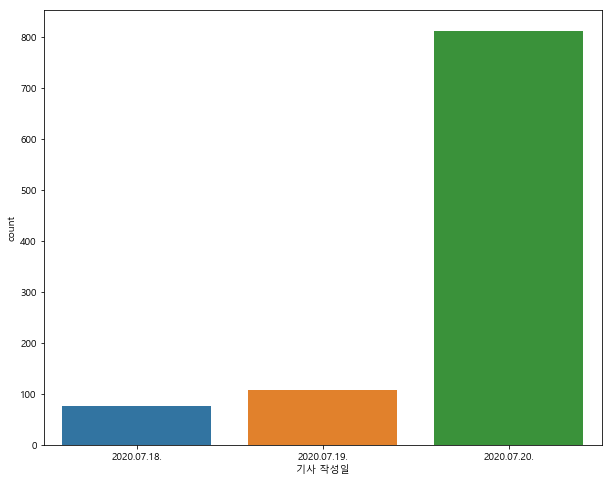

In [60]:
# 날짜를 기준으로 간단한 그래프 그리기
fig, ax = plt.subplots(figsize = (10, 8))

sns.countplot(x = "기사 작성일", data = df_유충)

In [61]:
# '서울'이라는 단어만 가진 새로운 데이터 프레임 만들기
df_서울 = df3[df3["단어"] == "서울"]

In [62]:
# '서울'단어의 데이터프레임 확인
df_서울

,단어,기사 작성일
614,서울,2020.07.19.
1519,서울,2020.07.20.
1530,서울,2020.07.20.
1540,서울,2020.07.20.
1552,서울,2020.07.20.
1559,서울,2020.07.20.
1566,서울,2020.07.20.
1576,서울,2020.07.20.
1591,서울,2020.07.20.
1597,서울,2020.07.20.


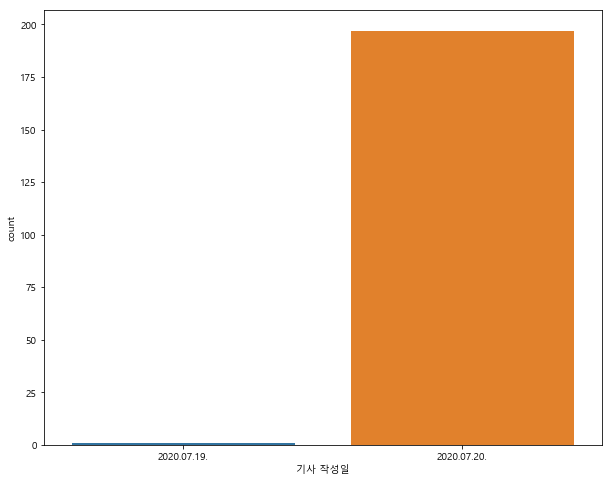

In [63]:
# 날짜를 기준으로 간단한 그래프 그리기
fig, ax = plt.subplots(figsize = (10, 8))

sns.countplot(x = "기사 작성일", data = df_서울)

In [64]:
# 컨테이너에 동일한 값의 자료가 몇개인지를 파악하는데 사용하는 객체
from collections import Counter

In [65]:
# 단어 빈도수 측정하기
c = Counter(df3["단어"])
c.most_common(100)

[('유충', 1019),
 ('수돗물', 987),
 ('신고', 304),
 ('발견', 278),
 ('인천', 244),
 ('서울', 203),
 ('정수', 156),
 ('서도', 156),
 ('조사', 139),
 ('점검', 117),
 ('건', 112),
 ('긴급', 92),
 ('부산', 87),
 ('전국', 82),
 ('서울시', 74),
 ('확산', 73),
 ('가정', 73),
 ('관련', 68),
 ('사태', 63),
 ('파주', 60),
 ('주', 60),
 ('곳', 59),
 ('필터', 57),
 ('생수', 56),
 ('중구', 55),
 ('발생', 54),
 ('아파트', 54),
 ('중', 49),
 ('확인', 49),
 ('등', 48),
 ('집', 48),
 ('총리', 48),
 ('경기', 44),
 ('샤워', 42),
 ('깔따구', 41),
 ('청주', 40),
 ('접수', 38),
 ('시', 37),
 ('추가', 36),
 ('정', 34),
 ('이상', 33),
 ('종합', 32),
 ('결과', 32),
 ('경기도', 32),
 ('원인', 31),
 ('불안감', 31),
 ('기', 31),
 ('민원', 29),
 ('추정', 28),
 ('현장', 27),
 ('유입', 27),
 ('특징', 27),
 ('급증', 27),
 ('지시', 27),
 ('의심', 26),
 ('대응', 25),
 ('불안', 25),
 ('서구', 24),
 ('부평', 24),
 ('청주시', 23),
 ('강화', 22),
 ('수도사', 22),
 ('판매', 22),
 ('파리', 21),
 ('가능성', 20),
 ('벌레', 19),
 ('하승진', 19),
 ('요인', 19),
 ('속보', 18),
 ('내', 18),
 ('웰크론한텍', 18),
 ('정세균', 18),
 ('오피스텔', 18),
 ('파주시', 18),
 ('장서', 17),
 ('배수지

In [66]:
# 불용어와 불필요한 1글자 단어를 제거하는 함수를 생성한다.
# 편리하게 사용가능한 '불용어 사전'이라는 것도 있지만 이번 과정에서는 최대한 노가다해보자..^^

stopword_list = ["서도", "외적"]

# 불용어 제거 함수
def remove_stopwords(words):
    result = []
    for w in words:
        if w not in stopword_list:
            result.append(w)
    return result
                
# 한 글자 단어 제거 함수
def remove_onewords(words):
    result = []
    for w in words:
        if len(w) != 1:
            result.append(w)
    return result

In [67]:
# 최종 함수 생성 (토큰화 + 불용어제거)

data_list = []

def tokenizing_and_cleaning(raw_text):
    
    # 명사 단위로 토큰화 하는 과정
    token = okt.nouns(raw_text)
    
    # 불용어 제거 
    stopwords = remove_stopwords(token)

    # 한글자 단어 제거 
    meaningful_words = remove_onewords(stopwords)
    
    data_list.append(meaningful_words)

In [68]:
# 함수 적용

df2["기사 제목"].apply(tokenizing_and_cleaning)

# data_list 리스트 안의 단어들로 토큰만 들어있는 리스트를 만든다.

word_list = []

for i in range(len(data_list)):
    word_list.extend(data_list[i])

# Q. append가 아닌 extend를 사용하는 이유는 무엇인가?

In [69]:
# 데이터프레임으로 만들어준다.
all_token = pd.DataFrame(word_list, columns = ["토큰"])
all_token.head()

,토큰
0,광주
1,수돗물
2,유충
3,신고
4,정수


In [73]:
# 상위 빈도순 100개
c = Counter(all_token["토큰"])
most_word = c.most_common(100)

In [74]:
# 데이터프레임으로 만들어준다.
most_token = pd.DataFrame(most_word, columns = ["단어 토큰", "빈도 수"])
most_token

,단어 토큰,빈도 수
0,유충,1019
1,수돗물,987
2,신고,304
3,발견,278
4,인천,244
5,서울,203
6,정수,156
7,조사,139
8,점검,117
9,긴급,92


In [76]:
# 워드 클라우드를 만들기 위해 사전(딕셔너리) 형태로 변경하기
word_dict = dict(c.most_common(400))

In [ ]:
! pip install wordcloud

In [78]:
# 미설치시 ! pip install wordcloud
from wordcloud import WordCloud

In [79]:
# 워드클라우드 마스크 코드
# 마스크를 위한 이미지는 png파일로 그림을 제외한 배경이 투명해야합니다. (포토샵의 바둑판표시)
# 이미지 크기를 잘 조절해야 폰트가 깨지지 않는 선에서 글씨가 빼곡하게 들어갑니다! 
# plt의 colormap을 사용하여 원하는 색상을 지정해줄 수 있습니다.

from PIL import Image
import numpy as np
import random

icon = Image.open('larva.png')
mask = Image.new("RGB", icon.size, (400,400,400))
mask.paste(icon,icon)
mask = np.array(mask)
cmap = plt.cm.PuBu

# 아래의 코드는 이미지 본 색상을 따라가는 코드입니다. (그림 색상을 그대로 가져와서 사용해야 할 때 ex.태극 문양)
from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)

# 시각화 하기 가장 좋고, 이쁘게 많은 정보를 표현할 수 있는 방법은 포토샵입니다!!!

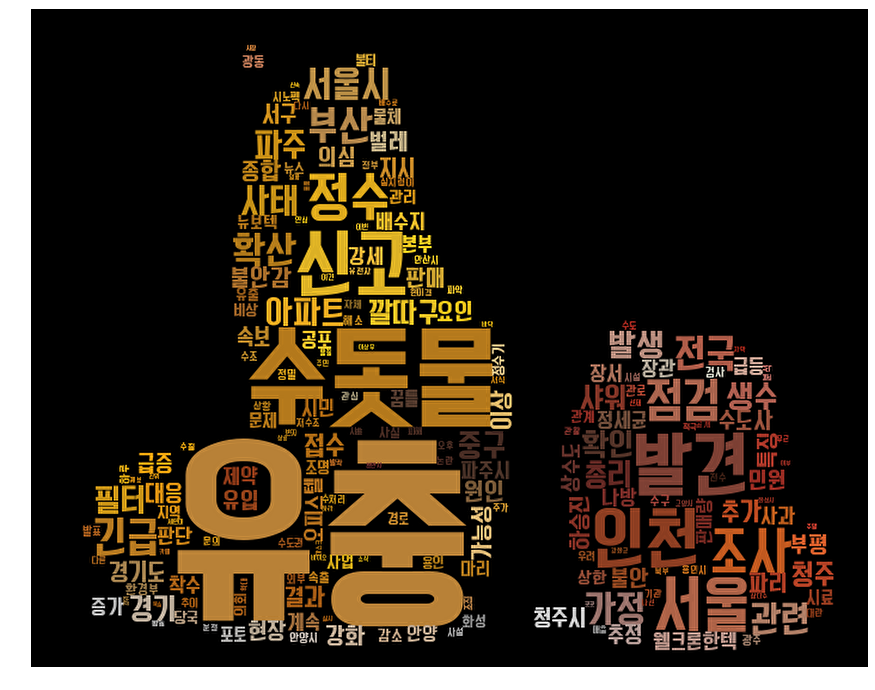

In [82]:
# 워드 클라우드 출력하기
wc = WordCloud(font_path = 'font.ttf',      # 폰트 지정 (본인이 원하는 폰트를 현재 디렉토리로 복붙하셔야합니다.) C:\Windows\Fonts에 있는 폰트를 복붙, 영어로 글꼴이름 변경
               mask = mask,                 # 위에서 만들어준 마스크 지정
               background_color = "black",  # 배경색 지정
               max_font_size = 250,         # 폰트사이즈지정 (그림을 구체화 시킬 때 사용합니다. 적당한 선을 본인 그림에 맞게 찾으셔야합니다.)
               margin = 0,                  # 토큰 사이사이의 빈 칸 크기 지정 (0이 가장 빼곡하므로 좋습니다.) 
               colormap = cmap)             # 위에서 지정한 plt의 colormap 지정 (본 워드클라우드는 이미지의 색을 따라가게 해놨으므로 적용되지 않습니다.)

cloud = wc.generate_from_frequencies(word_dict) # 빈도수를 활용하여 워드클라우드에 적용

plt.figure(figsize=(15,15))
# 아래의 코드는 ImageColorGenerator를 적용시키기 위한 코드
plt.imshow(cloud.recolor(color_func = image_colors), interpolation = "sinc") # interpolation는 이미지의 보간방법이라는데..지정해주는 인자마다 선명도의 차이를 보입니다.
plt.axis("off")
plt.show()

In [101]:
# 워드클라우드 png 파일로 저장

plt.imsave("텍스트마이닝 워드클라우드 실습.png", cloud)

<Figure size 432x288 with 0 Axes>